Loaded images shape: (1000, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1000,) /n Images with Folder name


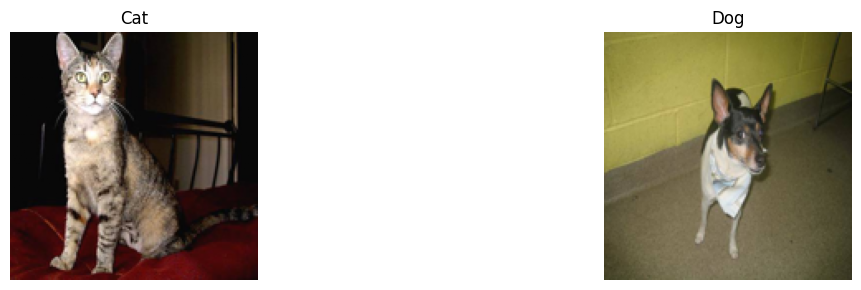

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
dataset_directory = '/content/drive/MyDrive/Transfer Learning Implementation'
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))
                image = np.array(image) / 255.0
                images.append(image)
                labels.append(i)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_names
images, labels, class_names = load_dataset(dataset_directory)
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))
for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import os
import numpy as np

In [ ]:
base_dir=dataset_directory

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 128
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 901 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.output

58889256/58889256 [==============================] - 3s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob(r"/content/drive/MyDrive/Transfer Learning Implementation/*")
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epoch = 1
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

8/8 [==============================] - 640s 91s/step - loss: 0.7651 - accuracy: 0.6016 - val_loss: 0.5300 - val_accuracy: 0.7374


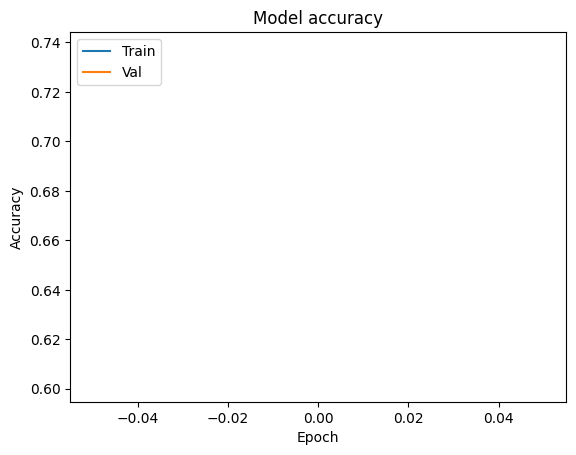

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

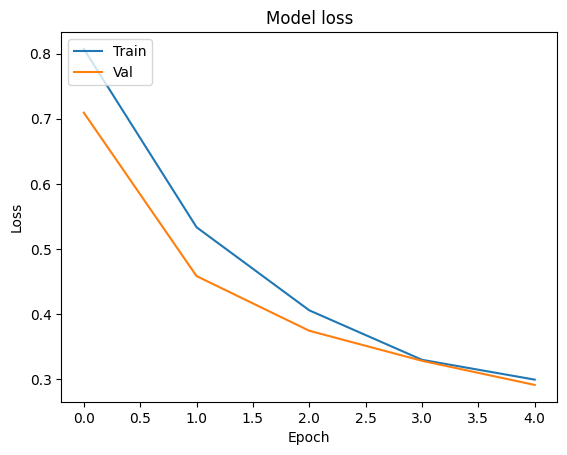

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

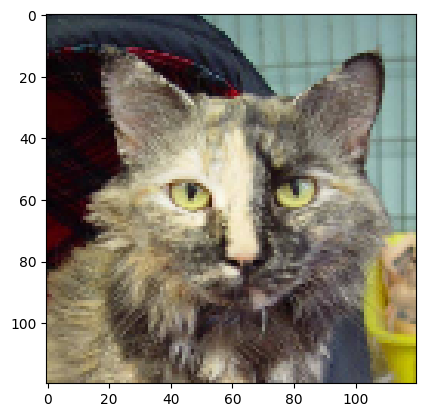

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
img = load_img(r"/content/drive/MyDrive/Transfer Learning Implementation/Cat/cat.10.jpg", target_size=(120,120))
img = img_to_array(img)
img = img / 255.0
plt.imshow(np.uint8(img*255))
plt.show()

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np
img_pred=image.load_img(r"/content/drive/MyDrive/Transfer Learning Implementation/Cat/cat.10.jpg",target_size=(224,224))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
rslt= model.predict(img_pred)
print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="cat"
else:
    prediction="dog"
print(prediction)

1/1 [==============================] - 1s 708ms/step
[[1. 0.]]
cat


In [ ]:
model.save('Transfer_Learning.h5')

'\nSaving the model:\nYou can save the model and its architecture by calling the save() method on the trained model object. \nThis method saves the entire model (architecture, weights, and optimizer state) to a file in the specified format.\n'

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('Transfer_Learning.h5')